<a href="https://colab.research.google.com/github/fereshtehdehkhoda/Example41-Regression/blob/main/S12soale3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#روی داده‌های آموزش hw12_train.csv یک مدل رگرسیون خطی ساده بسازید. کدام گزینه درباره این مدل درست است؟

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data=pd.read_csv('hw12_train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       350 non-null    float64
 1   y       350 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB


In [ ]:
feature=['x']
X_train=data[feature]

target="y"
y_train=data[target]

In [ ]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(X_train,y_train)
print(model_1.coef_)


y_train_pred_1=model_1.predict(X_train)
res_1=y_train- y_train_pred_1

from sklearn.metrics import r2_score,mean_absolute_percentage_error
print("R2",round(r2_score(y_train,y_train_pred_1),2))
print("MAPE", round(mean_absolute_percentage_error(y_train,y_train_pred_1),2))


[0.98851565]
R2 0.77
MAPE 0.91


In [ ]:
def hist_residuals(res, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(res)
    xp = np.linspace(np.min(res), np.max(res), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(res, bins = bins,
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(np.mean(res), color = 'black',
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()

    return plt.show()

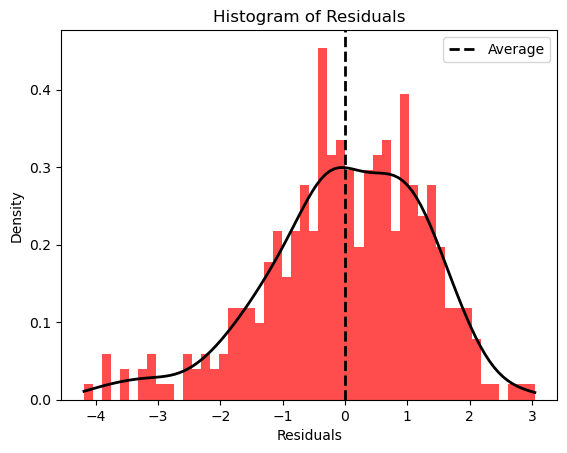

In [ ]:
hist_residuals(res_1)

In [ ]:
def residuals_fittedvalues_plot(res, fitted_values):
    #Implement Lowess algorithm
    lowess_res = sm.nonparametric.lowess(res, fitted_values)

    #Scatter plot: residuals vs. fitted values
    plt.scatter(x = fitted_values, y = res,
                color = 'red', alpha = 0.7, label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.grid()

    #Add LOWESS line
    plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black',
             alpha = 0.8, linewidth = 2, label = 'LOWESS')
    plt.legend()

    return plt.show()

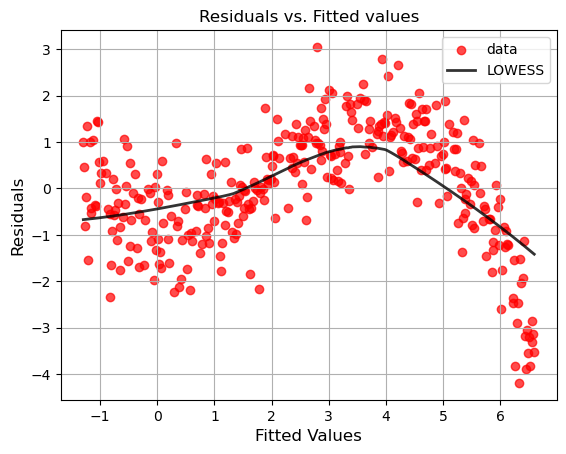

In [ ]:
residuals_fittedvalues_plot(res_1,y_train_pred_1)